## **Predicting California Housing Prices using Machine Learning**
This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of boston housing price prediction.

This notebook is only intended for a practical purpose of my studies in Machine Learning as a beginner.

### **What is Regression?**
Regression model provides a function that describes the relationship between one or more independent variables and a response, dependent, or target variable.

### **What we are Gonna Study?**
In this notebook we are gonna study the following topics:

* **Exploratory Data Analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model Training** - create model(s) to learn to predict a target variable based on other variables.
* **Model Evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model Comparison** - comparing several different models to find the best one.
* **Model Fine-Tuning** - once we've found a good model, how can we improve it?
* **Feature Importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-Validation** - if we do build a good model, can we be sure it will work on unseen data?
Reporting what we've found - if we had to present our work, what would we show someone?

---

## **Problem Definition**
In this case study, we will analyze a descriptive dataset about different dependent values ​​of a set of features.

As the main objective, we're going to get the best prediction possible by using all the features and datas that were given to us through the following data set.

**Statement**

> **Due the previously analyzed cases, what's the most probabaly value of this house?**

## **Dataset Description**

We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).

The file contains all the the variables. Specifically, it contains median house value, med ian income, housing median age, total rooms, total bedrooms, population, households, latitude, and lo ngitude in that order.

Eight features were measured from this data set:

* **MedInc median** - income in block group

* **HouseAge median** - house age in block group

* **AveRooms average** - number of rooms per household

* **AveBedrms average** - number of bedrooms per household

* **Population** - block group population

* **AveOccup average** - number of household members

* **Latitude block** - group latitude

* **Longitude block** - group longitude

In a regression context, this is a well-placed problem for assessing the most likely value for a selected combination of features.

## **References**
Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

The manuscript describing the data can be found at www.spatial-statistics.com. The data are also available as Matlab files.

## **What is a Feature in Machine Learning?**
In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon. Choosing informative, discriminating and independent features is a crucial element of effective algorithms in pattern recognition, classification and regression.

## **Evaluation**
Using differents types od models we are gonna try to evaluate the dataset of california housing datas.

**In this project we will use this case for studies and learning purposes.**

## **Dataset**
The dataset contains a set of 20640 records under 8 features.

**You can find the original data set in the Machine Learning package [Scikit - Learn page.](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)**

---

In [ ]:
# Regular EDA and Plotting Libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [ ]:
# load California Housing Dataset
from sklearn.datasets import fetch_california_housing
fetch_california_housing = fetch_california_housing()

In [ ]:
def dataframe():
  data = fetch_california_housing.data
  feature_names = fetch_california_housing.feature_names
  target = fetch_california_housing.target
  target_names = fetch_california_housing.target_names

  california_housing = pd.DataFrame(data, columns = feature_names)
  california_housing[target_names[0]] = target

  return california_housing

In [ ]:
# creating california housing dataframe
california_housing = dataframe()

In [ ]:
# checking the first 10 rows in the dataframe
california_housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [ ]:
# generating statics values on dataframe
california_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# checking for any Missing / NaN values
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


---

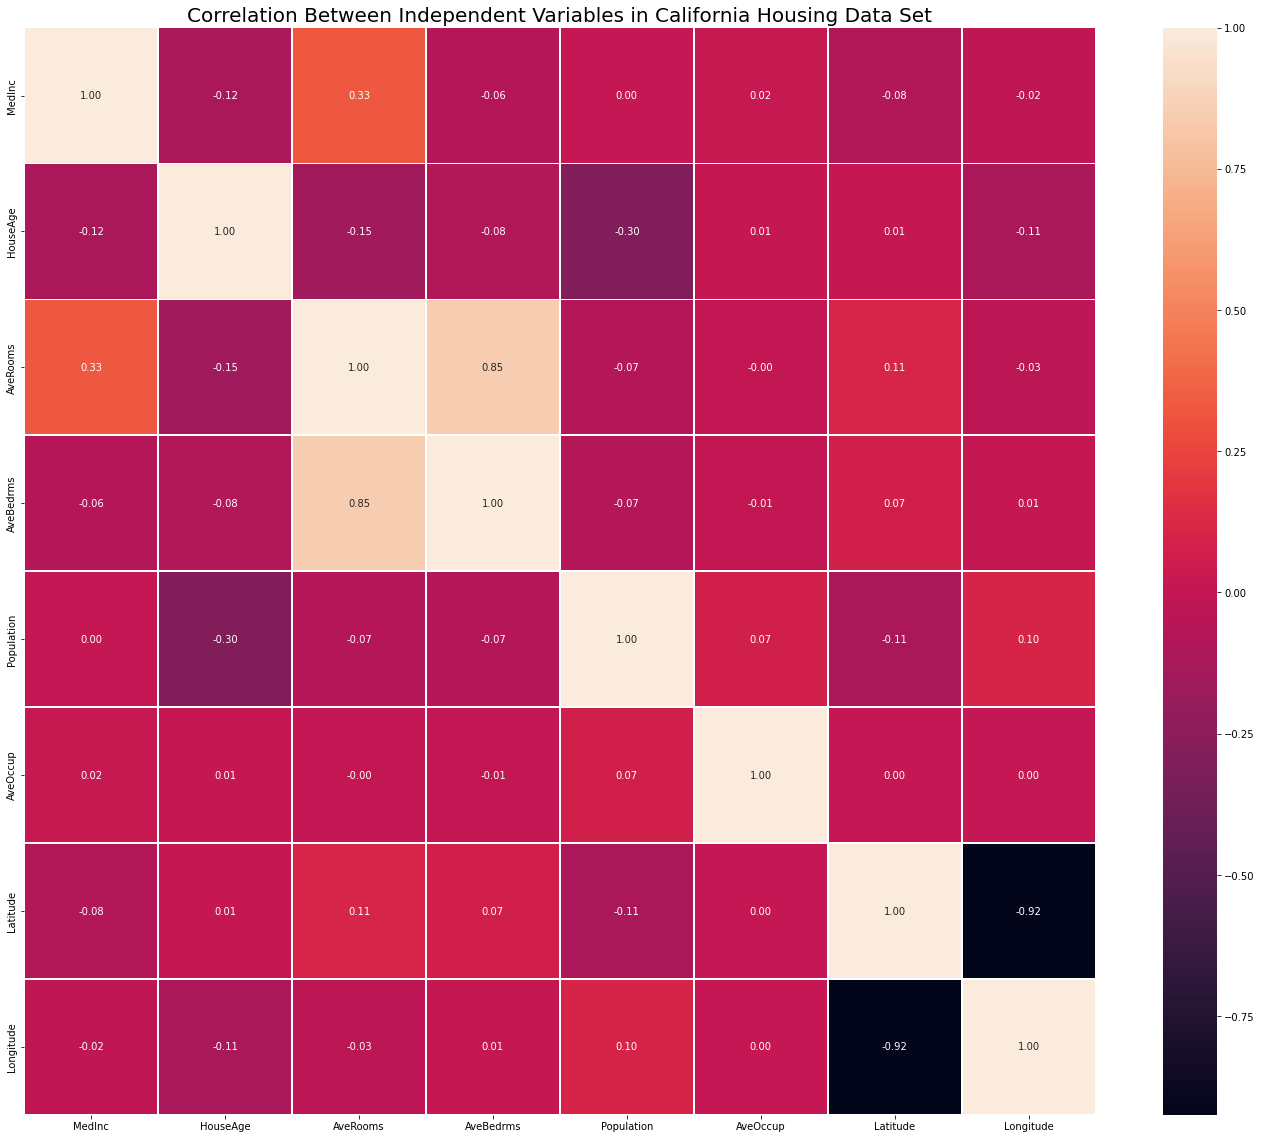

In [ ]:
# Correlation between independent variables
'''
This may give an idea of which independent variables may or may not have an impact on our target variable.
'''
corr_matrix = california_housing.drop(['MedHouseVal'], axis = 1).corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True,  linewidths=0.8, fmt= ".2f");
plt.title('Correlation Between Independent Variables in California Housing Data Set', fontsize=20);

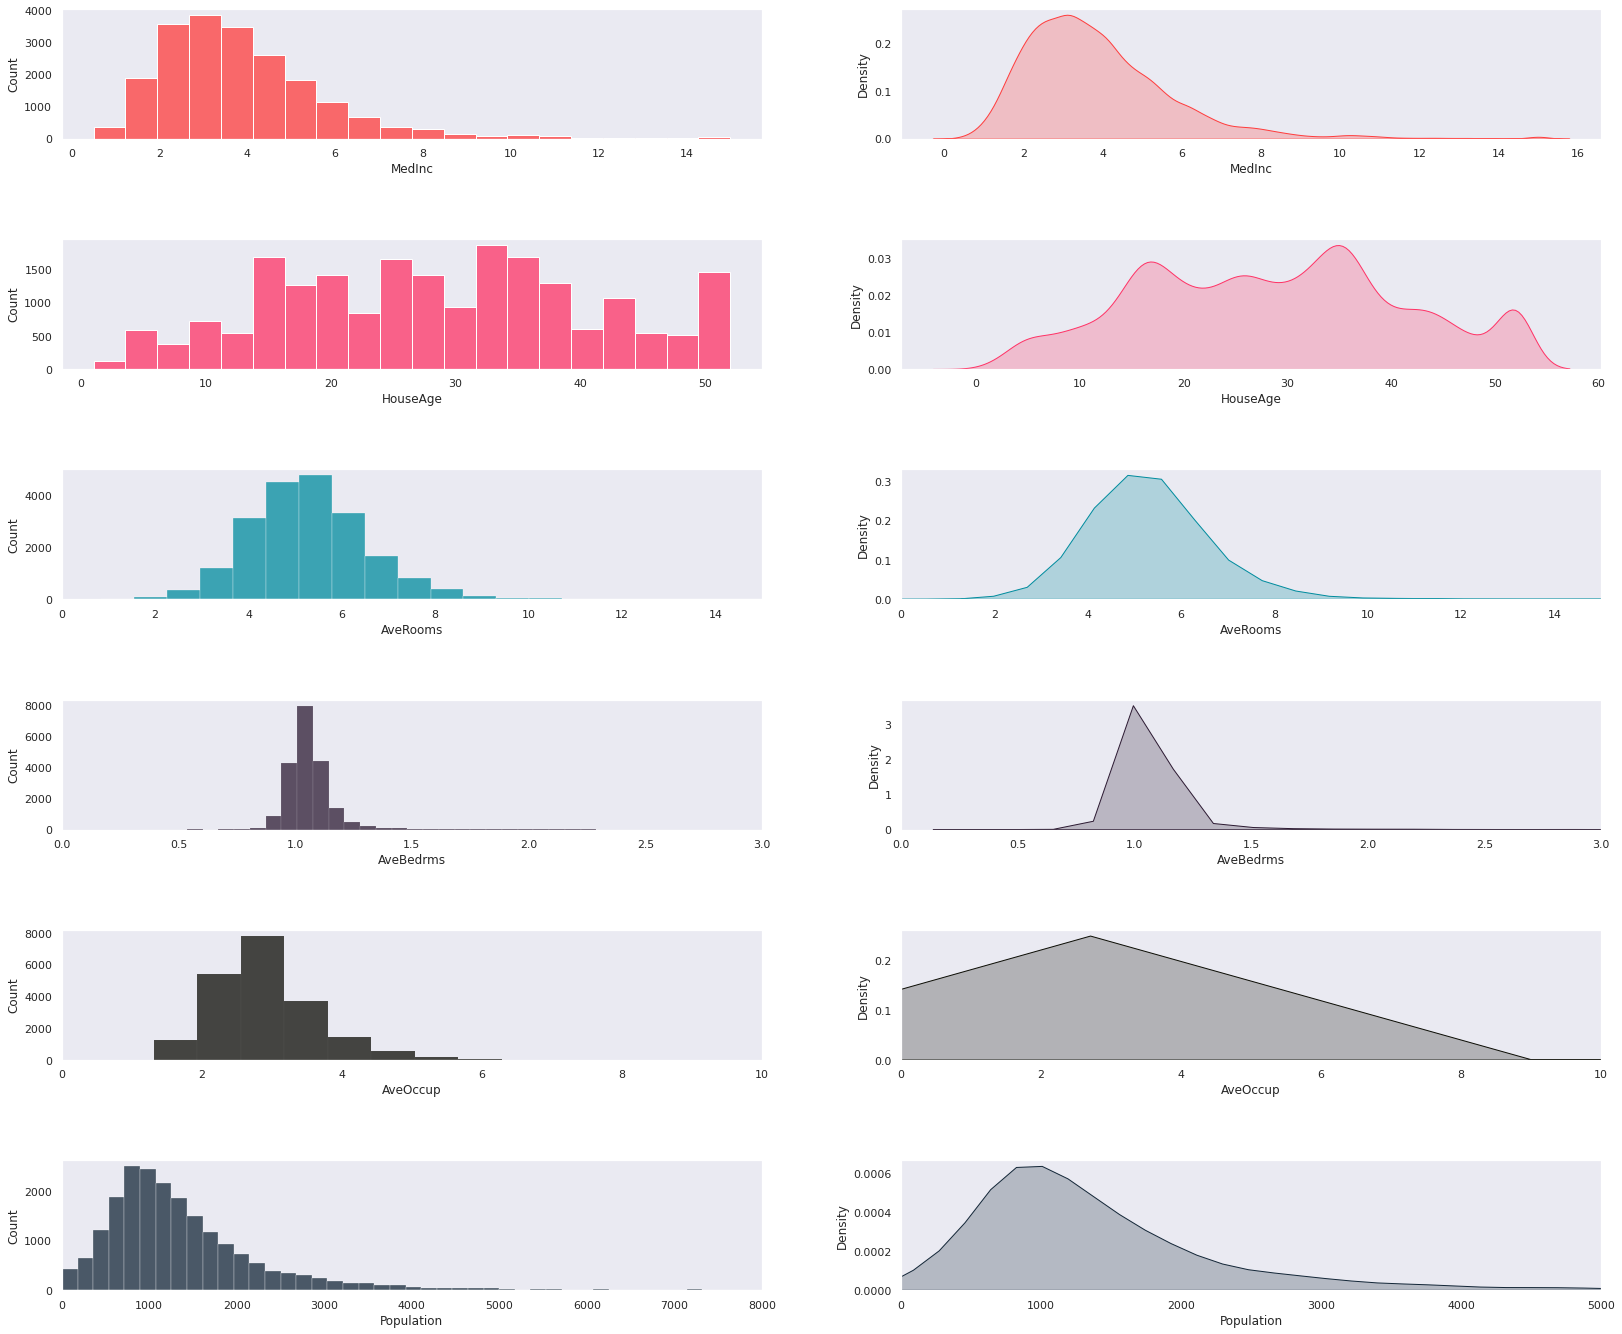

In [ ]:
# checking MedInc, HouseAge, 	AveRooms,	AveBedrms,	Population and AveOccup values distribution according california housing dataset

fig, axs = plt.subplots(nrows = 6, ncols = 2, figsize = (24,20))

sns.histplot(data = california_housing, x = 'MedInc', bins = 20, color = '#ff3d3d', ax = axs[0][0])
sns.kdeplot(data = california_housing, x = 'MedInc', shade = True, color = '#ff3d3d', ax = axs[0][1])

sns.histplot(data = california_housing, x = 'HouseAge', bins = 20, color = '#ff3366', ax = axs[1][0])
sns.kdeplot(data = california_housing, x = 'HouseAge', shade = True, color = '#ff3366', ax = axs[1][1])

sns.histplot(data = california_housing, x = 'AveRooms', bins = 200, color = '#008c9e', ax = axs[2][0])
sns.kdeplot(data = california_housing, x = 'AveRooms', shade = True, color = '#008c9e', ax = axs[2][1])
axs[2][0].set(xlim=(0,15))
axs[2][1].set(xlim=(0,15))

sns.histplot(data = california_housing, x = 'AveBedrms', bins = 500, color = '#2d1b33', ax = axs[3][0])
sns.kdeplot(data = california_housing, x = 'AveBedrms', shade = True, color = '#2d1b33', ax = axs[3][1])
axs[3][0].set(xlim=(0,3))
axs[3][1].set(xlim=(0,3))

sns.histplot(data = california_housing, x = 'AveOccup', bins = 2000, color = '#0c0d05', ax = axs[4][0])
sns.kdeplot(data = california_housing, x = 'AveOccup', shade = True, color = '#0c0d05', ax = axs[4][1])
axs[4][0].set(xlim=(0,10))
axs[4][1].set(xlim=(0,10))

sns.histplot(data = california_housing, x = 'Population', bins = 200, color = '#142738', ax = axs[5][0])
sns.kdeplot(data = california_housing, x = 'Population', shade = True, color = '#142738', ax = axs[5][1])
axs[5][0].set(xlim=(0,8000))
axs[5][1].set(xlim=(0,5000))

sns.set_style('dark')
fig.tight_layout(pad = 5.0)

In [ ]:
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

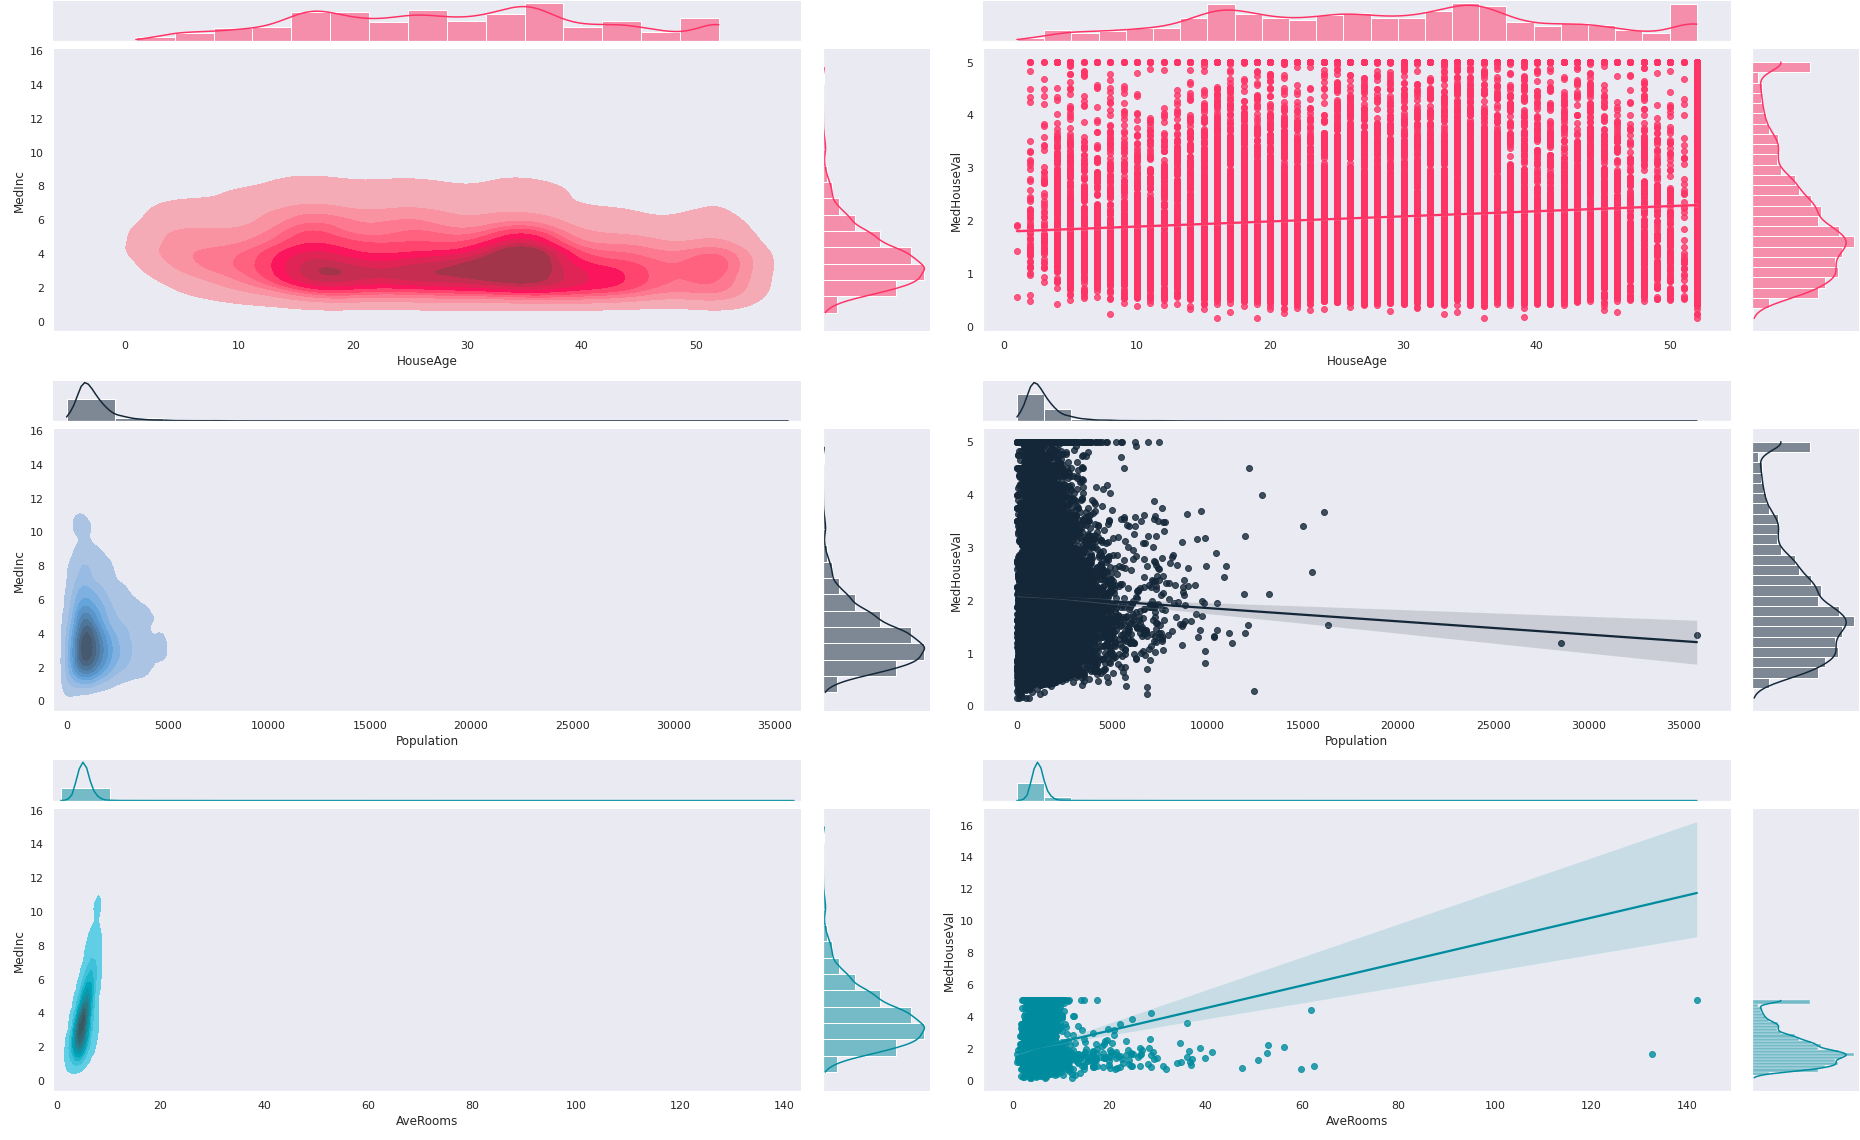

In [ ]:
# selecting some features and checking the possibility of correlation between them

# checking correlation possibility between HouseAge, MedInc and MedHouseVal 
g0 = sns.JointGrid(x="HouseAge", y="MedInc", data=california_housing)
g0.plot_joint(sns.kdeplot, color = '#ff3366', shade = True)
g0.plot_marginals(sns.histplot, kde = True, color='#ff3366', bins = 15)

g1 = sns.JointGrid(x="HouseAge", y="MedHouseVal", data=california_housing)
g1.plot_joint(sns.regplot, color = '#ff3366')
g1.plot_marginals(sns.histplot, kde=True, color='#ff3366', bins = 25)

# checking correlation possibility between Population, MedInc and MedHouseVal
g2 = sns.JointGrid(x="Population", y="MedInc", data=california_housing)
g2.plot_joint(sns.kdeplot, color = '#142738', shade = True)
g2.plot_marginals(sns.histplot, kde = True, color='#142738', bins = 15)

g3 = sns.JointGrid(x="Population", y="MedHouseVal", data=california_housing)
g3.plot_joint(sns.regplot, color = '#142738')
g3.plot_marginals(sns.histplot, kde=True, color='#142738', bins = 25)

# checking correlation possibility between AveRooms, MedInc and MedHouseVal
g4 = sns.JointGrid(x="AveRooms", y="MedInc", data=california_housing)
g4.plot_joint(sns.kdeplot, color = '#008c9e', shade = True)
g4.plot_marginals(sns.histplot, kde = True, color='#008c9e', bins = 15)

g5 = sns.JointGrid(x="AveRooms", y="MedHouseVal", data=california_housing)
g5.plot_joint(sns.regplot, color = '#008c9e')
g5.plot_marginals(sns.histplot, kde=True, color='#008c9e', bins = 25)


fig = plt.figure(figsize=(26,16))
gs = gridspec.GridSpec(3, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])

mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])

mg4 = SeabornFig2Grid(g4, fig, gs[4])
mg5 = SeabornFig2Grid(g5, fig, gs[5])


gs.tight_layout(fig)
sns.set_style('dark')

---

## **Spliting Data and Fiting Models**

In [ ]:
# Split data into training and validation sets
X = california_housing.drop(['MedHouseVal'], axis = 1)
y = california_housing['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
# Put models in a dictionary
models = {"RandomForestRegressor": RandomForestRegressor(),
          "Linear Regression": LinearRegression(),
          "Logistic Regression": Ridge(), 
          "Lasso": Lasso()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_valid : validation data
    y_train : labels assosciated with training data
    y_valid : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'RandomForestRegressor': 0.8157543846515791,
 'Linear Regression': 0.603990978975322,
 'Logistic Regression': 0.604044908496052,
 'Lasso': 0.28621309106301573}

---

## **Model Comparison**

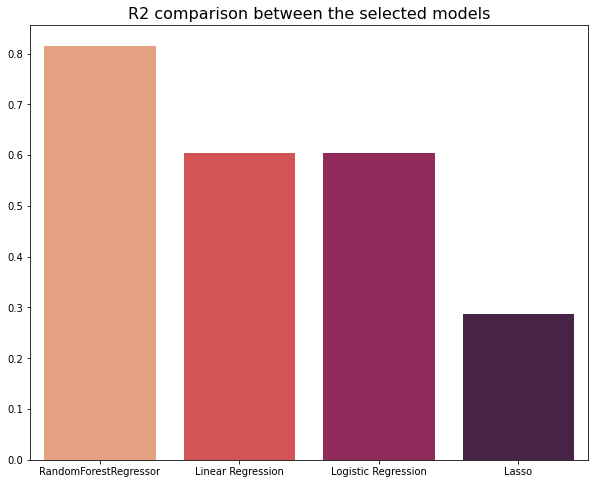

In [ ]:
model_comparison = pd.DataFrame(model_scores, index = ['R2'])

# simple bar graph comparison
plt.figure(figsize = (10,8))
sns.barplot(data = model_comparison, palette = 'rocket_r');
plt.title('R2 comparison between the selected models', fontsize = 16);

---

## **Hyperparameter Tuning and Cross-Validation**

In this case, we are gonna use the RandomForestRegressor Model due his better performance according the **Model Comparsion** bar chart above.

**Note**: This is only a study case, so we don't need a perfect model using all HyperParameters.

In [ ]:
# RandomForestRegressor hyperparameters grid
rfr_grid = {"max_depth": [None, 3, 5, 10],
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

### **Changing Hyperparameters using `GridSearchCV`**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestRegressor
gs_rfr = GridSearchCV(RandomForestRegressor(), param_grid = rfr_grid, cv = 5, verbose = True, error_score = True)

# Fit grid hyperparameter search model
gs_rfr.fit(X_train, y_train)

In [ ]:
# Check the best parameters
gs_rfr.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}

### **Changing Hyperparameters using `RandomizedSearchCV`**


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestRegressor
rs_rfr = RandomizedSearchCV(RandomForestRegressor(), param_distributions = rfr_grid, cv = 5, verbose = True, error_score = True)

# Fit grid hyperparameter search model
rs_rfr.fit(X_train, y_train)

In [ ]:
# Check the best parameters
rs_rfr.best_params_

{'min_samples_leaf': 15, 'max_features': 0.5, 'max_depth': None}

### **Changing Hyperparameters using `HalvingGridSearchCV`**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestRegressor
hs_rfr = HalvingGridSearchCV(RandomForestRegressor(), param_grid = rfr_grid, cv = 5, verbose = True, error_score = True)

# Fit grid hyperparameter search model
hs_rfr.fit(X_train, y_train)

In [ ]:
# Check the best parameters
hs_rfr.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}

---

## **Evaluating a Regression Model**

Evaluations parameters:

* **MSLE** (mean squared log error)
* **MAE** (mean absolute error)
* **RMSLE** (root mean squared log error)

In [ ]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"MAE": mean_absolute_error(y_test, val_preds),
              "RMSLE": rmsle(y_test, val_preds),
              "R^2": model.score(X_test, y_test)}
    return scores

In [ ]:
# evaluating the RandomForestRegressor model with GridSearchCV hyperparameters
gs_rfr_scores = show_scores(gs_rfr)
gs_rfr_scores

{'MAE': 0.32428849348352734,
 'RMSLE': 0.14579887945918357,
 'R^2': 0.8262429345487167}

In [ ]:
# evaluating the RandomForestRegressor model with RandomizedSearchCV hyperparameters
rs_rfr_scores = show_scores(rs_rfr)
rs_rfr_scores

{'MAE': 0.3514947832185865,
 'RMSLE': 0.15766535111189448,
 'R^2': 0.7968042431562126}

In [ ]:
# evaluating the RandomForestRegressor model with HalvingGridSearchCV hyperparameters
hs_rfr_scores = show_scores(hs_rfr)
hs_rfr_scores

{'MAE': 0.32512931841085285,
 'RMSLE': 0.14590255372491226,
 'R^2': 0.8261387788056085}

---

## **Classification Report**

* **Negative MAE**
* **Negative MSE**
* **Negative MRMSE**
* **Negative MSLE**
* **Negative MAPE**
* **R2**

### **Classification Report using `scoring` Method**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def neg_scoring_classification_report(model):
  nmae = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error"))
  nmse  = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error"))
  nrmse   = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error"))
  nmsle   = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_log_error"))
  nmape   = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_percentage_error"))
  r2   = np.mean(cross_val_score(model, X, y, cv=5, scoring="r2"))

  cv_report = pd.DataFrame({'Neg. MAE': nmae, 
                            'Neg. MSE': nmse,
                            'Neg. MRMSE': nrmse, 
                            'Neg. MSLE': nmsle,
                            'Neg. MAPE': nmape,
                            'R2': r2}, index = [0])

  return cv_report

In [ ]:
# creating RandomForestRegressor with GridSearchCV parameters
gs_rfr = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf =  1)
gs_rfr.fit(X_train, y_train)

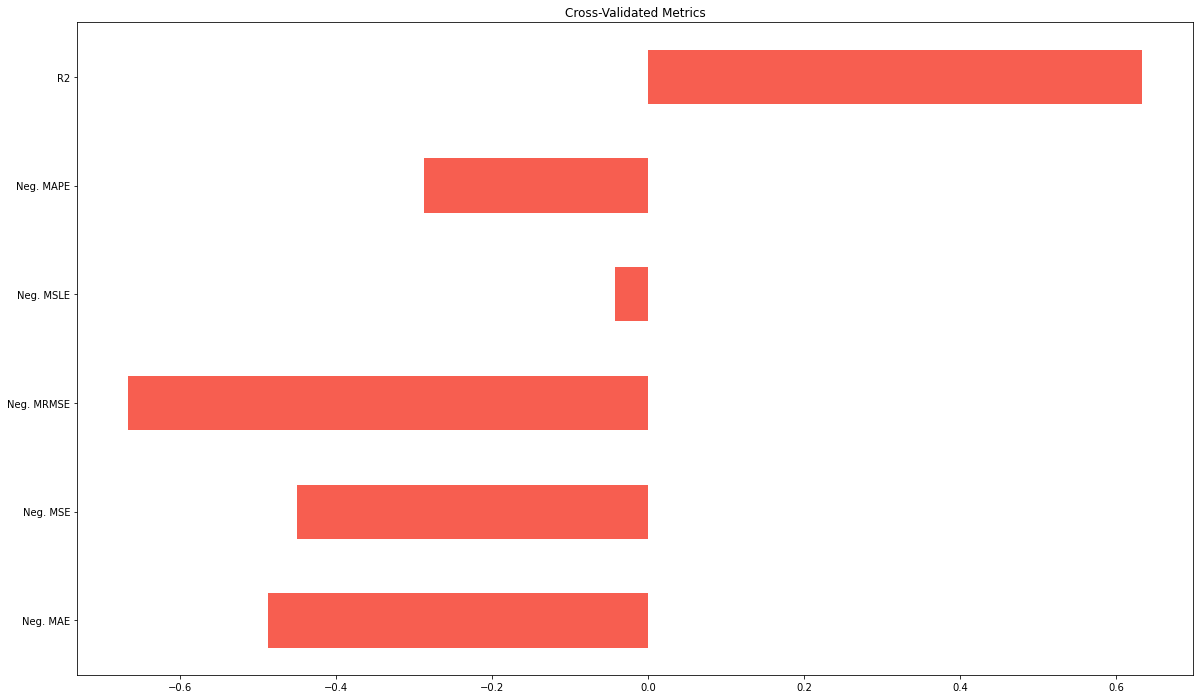

In [ ]:
# RandomForestRegression Model classification report using GridSearchCV parameters
cv_metrics = neg_scoring_classification_report(gs_rfr)
ax = cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#f75e50');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

In [ ]:
# creating RandomForestRegressor with RandomizedSearchCV parameters
rs_rfr = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf =  15)
rs_rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=15)

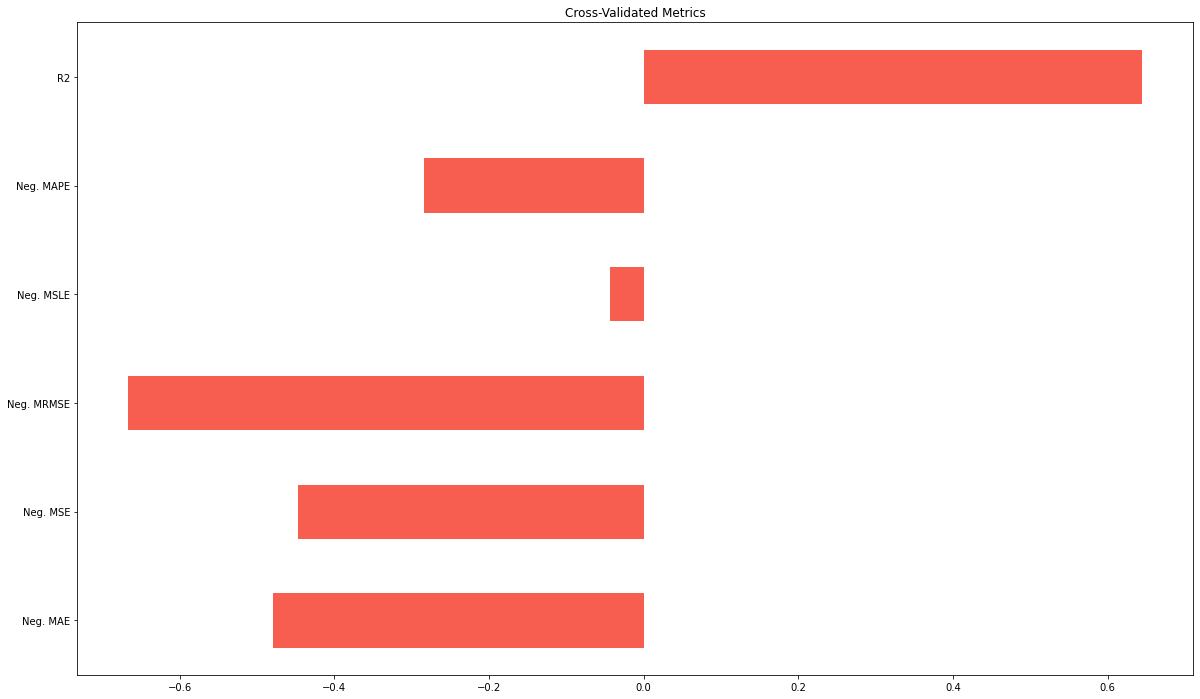

In [ ]:
# RandomForestRegression Model classification report using RandomizedSearchCV parameters
cv_metrics = neg_scoring_classification_report(rs_rfr)
ax = cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#f75e50');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

In [ ]:
# creating RandomForestRegressor with HalvingGridSearchCV parameters
hs_rfr = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf =  1)
hs_rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt')

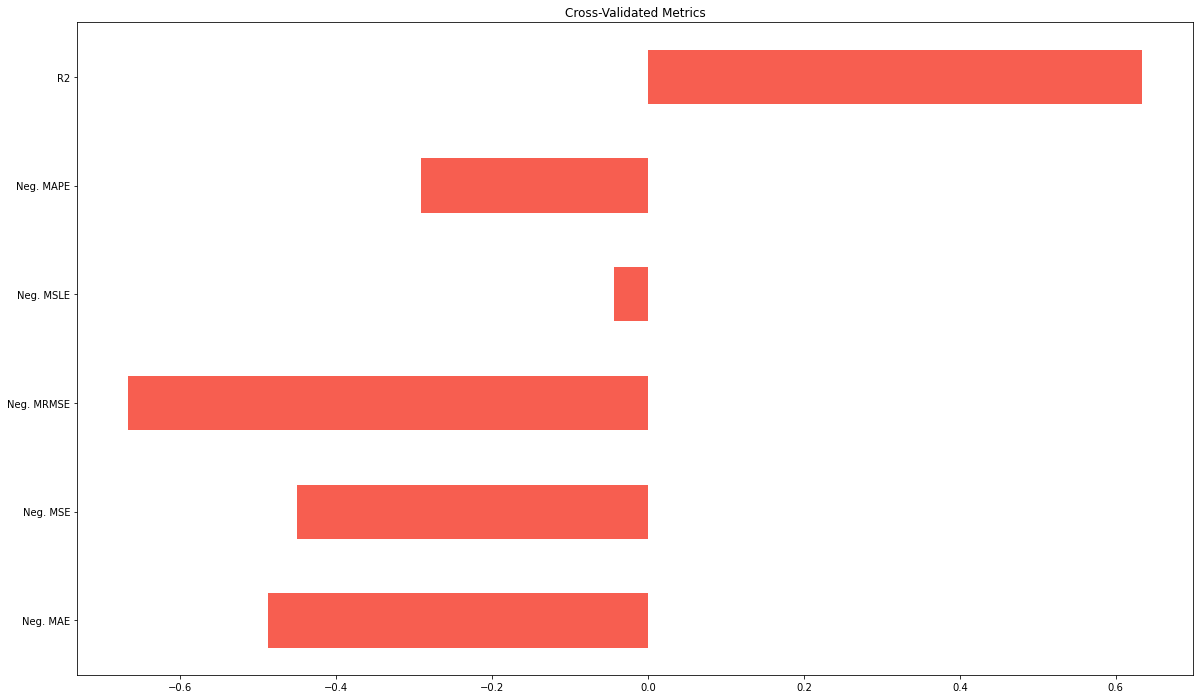

In [ ]:
# RandomForestRegression Model classification report using HalvingGridSearchCV parameters
cv_metrics = neg_scoring_classification_report(hs_rfr)
ax = cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#f75e50');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

---

## **Feature importance**

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

**The larger the value (bigger bar), the more the feature contributes to the models decision.**

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    plt.figure(figsize = (16,12))
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

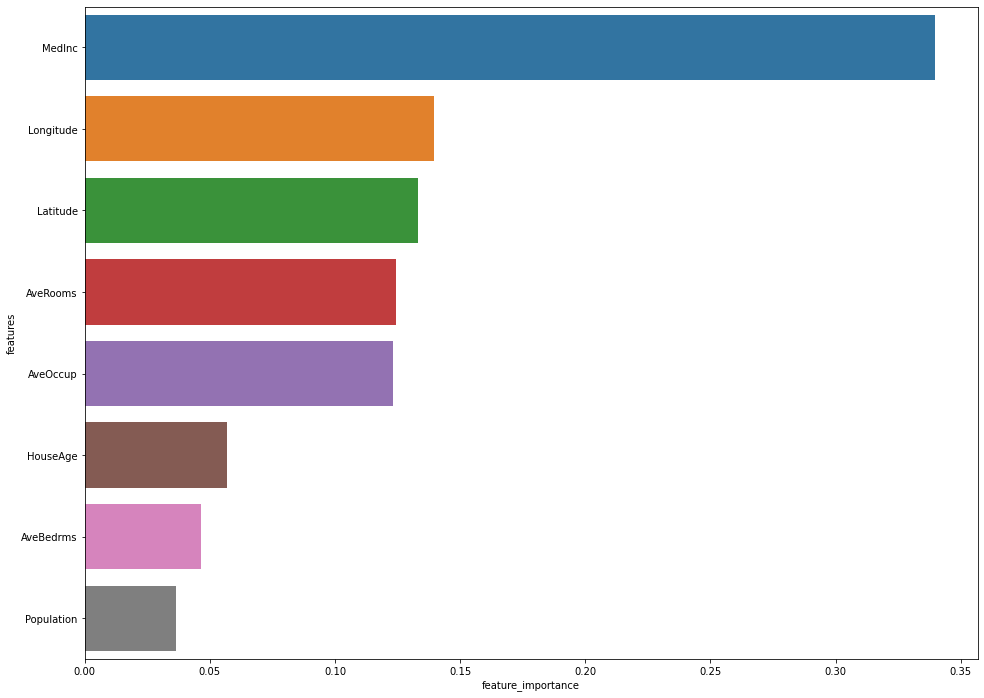

In [ ]:
plot_features(X_train.columns, gs_rfr.feature_importances_)

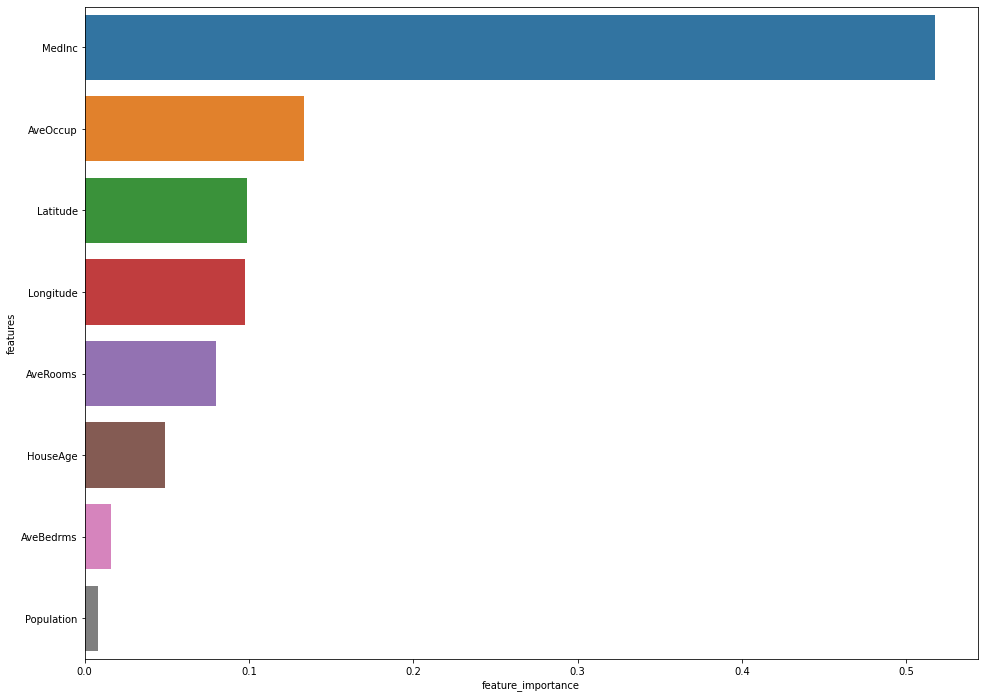

In [ ]:
plot_features(X_train.columns, rs_rfr.feature_importances_)

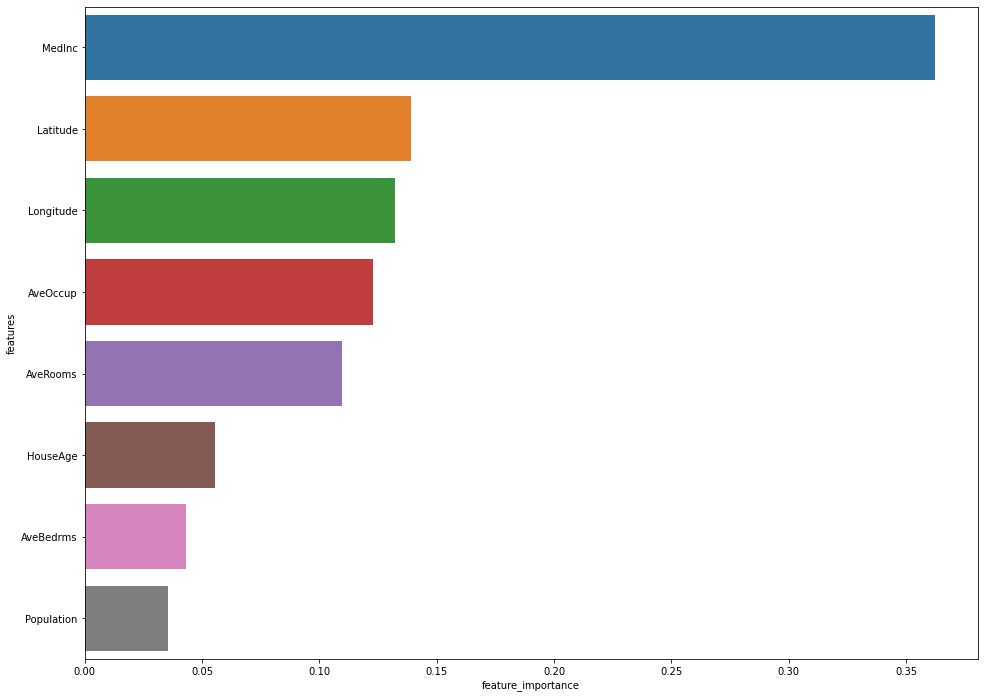

In [ ]:
plot_features(X_train.columns, hs_rfr.feature_importances_)

---

## **Comparing Model Prediction**

In this topic we're gonna take a visualy comparison between the expected values showed in the boston housing data set against the predictions made.

In [ ]:
from matplotlib.lines import Line2D

In [ ]:
def histkde_comparsion_graph(model, y_preds):
  variables = [y_preds, np.array(y_test)]

  custom = [Line2D([], [], marker='.', color='#536d88', linestyle='None'),
            Line2D([], [], marker='.', color='#ffb884', linestyle='None')]

  fig, axs = plt.subplots(ncols = 2, figsize = (24,12))
  fig.suptitle('A Histogram and KDE graph for comparsion between the actual values and the pred values', fontsize = 18);

  sns.histplot(data = variables, ax = axs[0])
  axs[0].set(title = f'Target distribution comparison ({model} Model)');
  sns.kdeplot(data = variables, shade = True ,ax = axs[1])
  axs[1].set(title = f'Target density comparison ({model} Model)');


  for col in range(2):
    axs[col].legend(custom, [model, 'California Data Set', ],loc = 'upper right');

In [ ]:
#Comparing the RandomForestRegressor GridSearchCV Model predictions
y_preds = gs_rfr.predict(X_test)

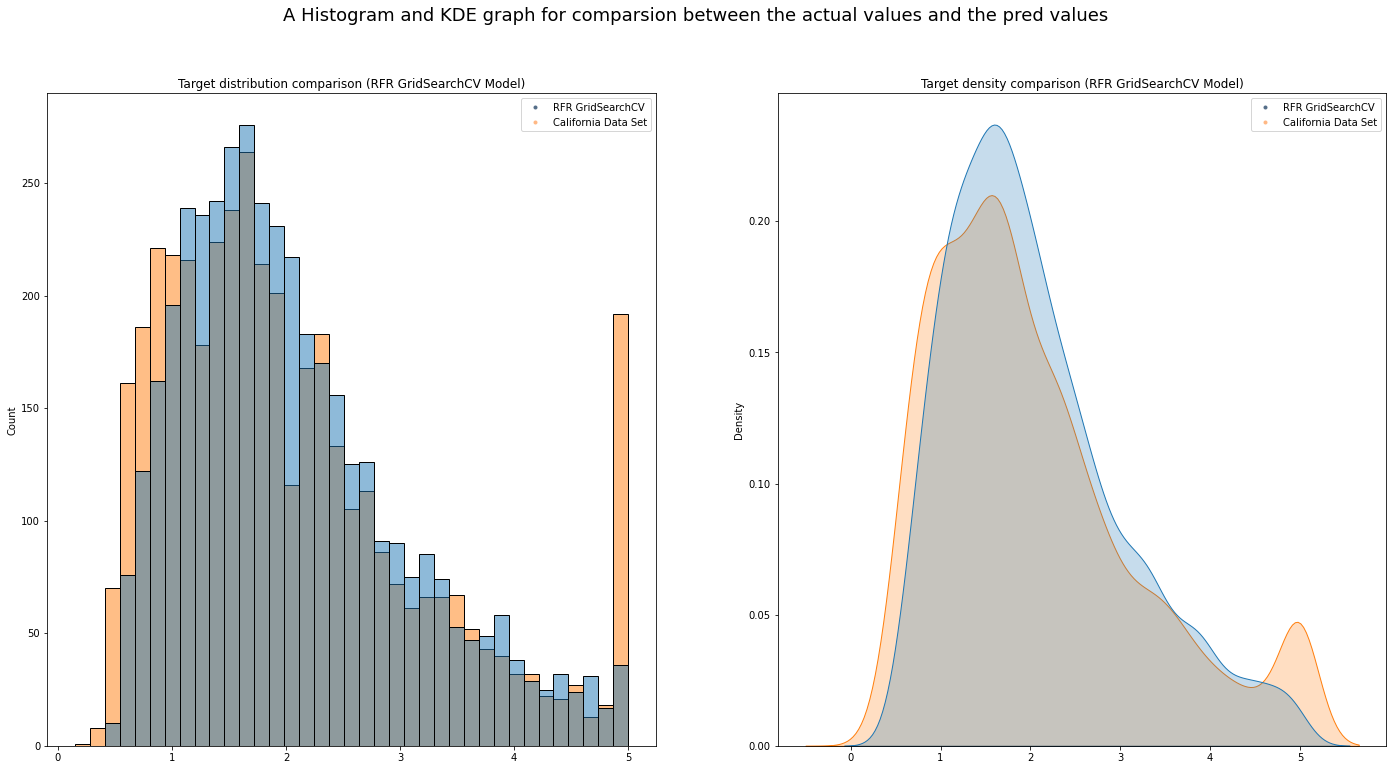

In [ ]:
histkde_comparsion_graph('RFR GridSearchCV', y_preds)

In [ ]:
#Comparing the RandomForestRegressor RandomizedSearchCV Model predictions
y_preds = rs_rfr.predict(X_test)

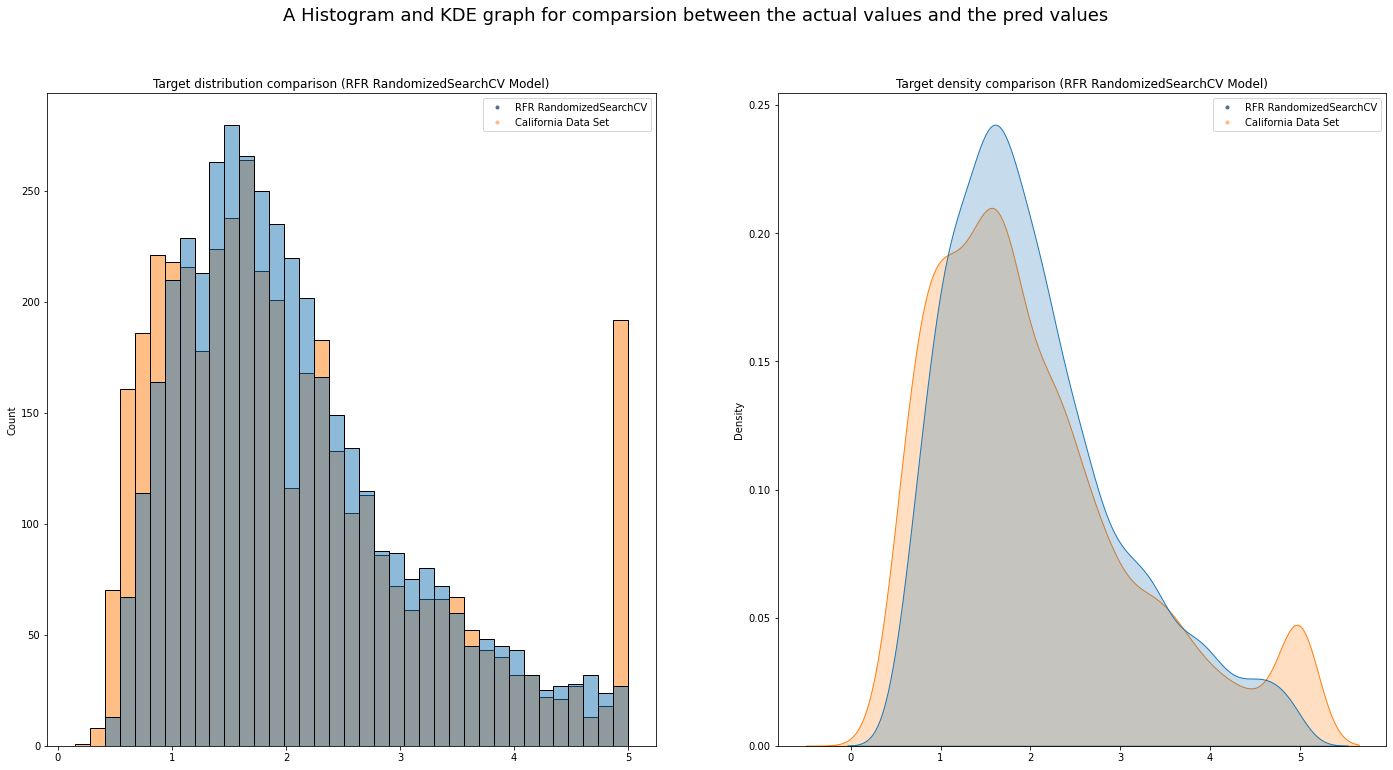

In [ ]:
histkde_comparsion_graph('RFR RandomizedSearchCV', y_preds)

In [ ]:
#Comparing the RandomForestRegressor Model predictions
y_preds = hs_rfr.predict(X_test)

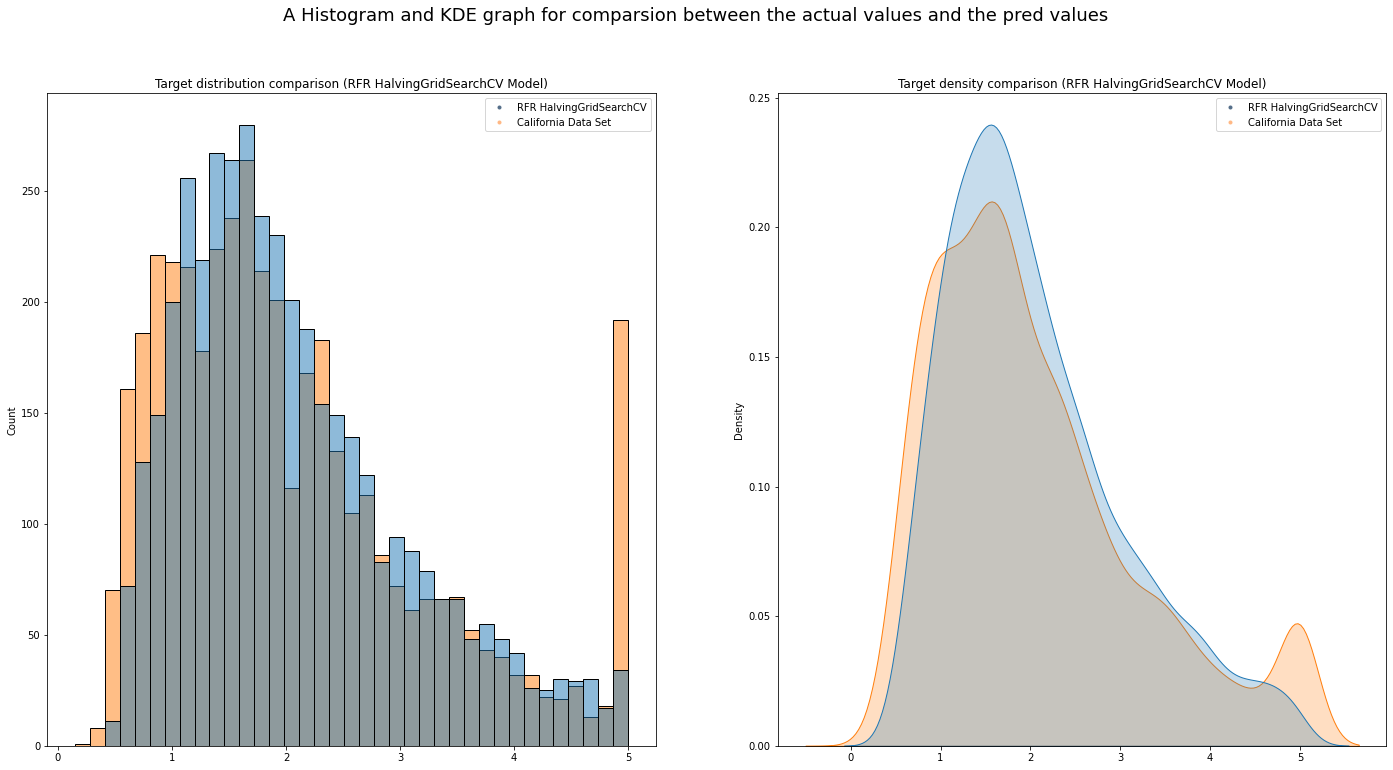

In [ ]:
histkde_comparsion_graph('RFR HalvingGridSearchCV', y_preds)